# SPLC 2019:  Process Mining to unleash Variability Management, Discovering Configuration Workflows using Logs

## Introduction

This notebook presents the methodology followed to carry out the hierarchical agglomerative clustering process in the traces of the XES logs. 

First of all, it is necessary to load the necessary libraries to work.

In [114]:
import os
import sys
import xmltodict
from json import dumps,loads
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
import xml.etree.ElementTree as xml
from xml.etree import ElementTree
from xml.etree.ElementTree import Element, SubElement
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
import itertools
from iteration_utilities import unique_everseen

## Original Spaghetti Process

Ee will begin by analyzing the spaghetti process of the original model. 

To do this, we construct the process matrix using the following function. Where it will be necessary to modify the *path* variable, so that it points towards the .XES of the original process.

In [115]:
def get_df_original():
    path2 = './files/ERP2.xes'

    xml_string2 = open(path2,mode='r').read()
    log_is2 = xmltodict.parse(xml_string2)
    log_is2 = loads(dumps(log_is2))

    events_set2 = set()
    traces2 = log_is2['log']['trace']
    new_traces2 = list(map(lambda x: {'id_trace':x['string']['@value'],'events':x['event']}, traces2))

    for i in new_traces2:
        new_events2 = list(map(lambda x: x['string']['@value'],i['events']))
        i['events'] = new_events2

    for i in new_traces2:
        events_set2.update(i['events'])

    columns2 = np.array(list(events_set2),dtype=object)
    traces_rows2 = []
    for trace in new_traces2:
        count = 0
        zeros = np.zeros(len(columns2))
        zeros = np.append(zeros,[trace['id_trace']])
        for i in columns2:
            if (i in trace['events']):
                zeros[count] = 1
            count = count + 1
        traces_rows2.append(zeros)
    
    traces_rows22 = list(map(lambda x: pd.Series(x),traces_rows2))

    df22 = pd.DataFrame()
    df22 = pd.concat(traces_rows22, axis=1)
    df22 = df22.T

    columns22 = np.append(columns2,['id_instance'])
    df22.columns = columns22

    cols22 = df22.columns.tolist()
    cols22 = cols22[-1:] + cols22[:-1]
    df22 = df22[cols22]
    df22.iloc[:,1:df22.shape[1]] = df22.iloc[:,1:df22.shape[1]].apply(pd.to_numeric) 
    
    return df22

In [116]:
df_original = get_df_original()
df_original

,id_instance,2544,760,8235,1059,597,152,1165,1763,8239,...,1009,776,2621,627,8101,8018,4001,297,1015,4005
0,instance_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,instance_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,instance_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,instance_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,instance_5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,instance_6,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,1,0,0,0,0
6,instance_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,instance_8,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,0,0,0
8,instance_9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,instance_10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Modify the column of identifier of the instances so that they have a numerical format

In [118]:
df_original['id_instance'] = [i for i in range(2,df_original.shape[0]+2)]
df_original

,id_instance,2544,760,8235,1059,597,152,1165,1763,8239,...,1009,776,2621,627,8101,8018,4001,297,1015,4005
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,1,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,0,0,0
8,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## XES log reading and dataframe transformation

Set the path on which to read the XES log.

In [50]:
path = './files/ERP-VALID pretty.xes'

The XES log is read as a conventional XML file and is parsed to transform it into a Python's dictionary structure, to be able to handle it better in the following operations.

In [51]:
xml_string = open(path,mode='r').read()
log_is = xmltodict.parse(xml_string)
log_is = loads(dumps(log_is))

Starting from the dictionary that represents the log of events the traces of de process are extracted in the **traces** variable.
After that, in the **new_traces** variable is saved a list which contains all the dictionaries of the traces transformed in a better format to facilitate its handling.

The new format can be described as: *{ id_instance: instance_x, events: [{}, ..., {}] }*, where each {} object represents the original parsed XES without any processing yet. 

The simplest representation of each event is something like: *{'string': {'@key': 'concept:name', '@value': 'event_x_name'}}*, what can be difficult to handle, that's why we neeed to improve the data structure that represents the events of each trace, using for that the first for loop, where the necessary operations are carried out so that each trace has the following format: *{ id_instance: instance_x, events: [ event_1_name, ...,event_n_name ] }*.

Finally, the last loop builds a set (**events_set**) containing an object for each different type of activity within the process. 

In [52]:
events_set = set()
traces = log_is['log']['trace']
new_traces = list(map(lambda x: {'id_trace':x['string']['@value'],'events':x['event']}, traces))

for i in new_traces:
    new_events = list(map(lambda x: x['string']['@value'],i['events']))
    i['events'] = new_events

for i in new_traces:
    events_set.update(i['events'])

In **columns** variable we store in a list one object for each possible activity within the process. 

We proceed to build the rows of our dataframe, for it, we will use the list **traces_rows**.


We will use a for loop that iterates over each trace and performs the following operations: 
- Build a list with as many zeros as columns has the dataframe and at the last position, the identifier of the trace
- This list enters in a new loop that iterates over the columns of the dataframe (different possible activities within the process) and changes the value 0 to 1 in those cells where the activity <i>i</i> is executed in the trace <i>trace</i>.


Finally, in **traces_rows_2** you have the same information but in Pandas Series format, with which dataframes work more easily.

In [53]:
columns = np.array(list(events_set),dtype=object)
traces_rows = []
for trace in new_traces:
    count = 0
    zeros = np.zeros(len(columns))
    zeros = np.append(zeros,[trace['id_trace']])
    for i in columns:
        if (i in trace['events']):
            zeros[count] = 1
        count = count + 1
    traces_rows.append(zeros)
    
traces_rows2 = list(map(lambda x: pd.Series(x),traces_rows))

We start building the dataframe, inserting in it a row for each trace registered in **traces_rows2**. 

Because pandas will store in the dataframe a column for each trace instead of a row, using mathematical concepts available in pandas, we get the transposed dataframe to have one row per trace.

After that, in the columns list, the column for the *id_instance* is added, which represents the trace identifier. Next, the names of each column are added to the dataframe.

Finally, the order of the names of the columns is changed so that the column *id_instance* appears first and makes it easier to read. 

In [54]:
df = pd.DataFrame()
df = pd.concat(traces_rows2, axis=1)
df = df.T

columns = np.append(columns,['id_instance'])
df.columns = columns

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df.apply(pd.to_numeric) 
df['id_instance'] = df['id_instance'].astype(str)
df

,id_instance,1902,8235,1097,8141,8067,1303,8123,1763,8135,...,1207,8130,1403,946,1754,8026,8018,317,1350,8236
0,44,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,323354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,323351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,273,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,198,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,155,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


With the following instruction, it is possible to save the dataframe in a csv file. 

In [ ]:
df.to_csv("./files/my_process_dataframe.csv", encoding='utf-8', index=False)

## Entropy matrix calculation

In [ ]:
#Run just in case you need to read the dataframe from the file
df = pd.read_csv('./files/my_process_dataframe.csv')
df

We start building the entropy matrix using a dataframe that will have as many rows and columns as there are traces in our event log.

Additionally, we will have one more column that will represent the identifier of each trace. As in the previous process, operations are performed to position it first.

The resulting dataframe/matrix will be full of null values that we will fill in later.

In [55]:
columns = df['id_instance'].values
df2 = pd.DataFrame(columns=columns)
df2['id_instance'] = df['id_instance']
cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df2[cols]
df2

,id_instance,44,323354,45,47,323351,49,273,198,1019,...,183,142,147,10000,701,703,82,83,949,100007
0,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,323354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,323351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will proceed to fill in the entropy values of the matrix.  

To do this, we will iterate over the rows of the original dataframe, to obtain in each iteration a row. 
Inside it, we will cross again all the rows of the original dataframe, in order to calculate the entropy for each pair of rows (traces). 

Let's remember that our original dataframe has as many columns as possible different activities within the process and a row for each trace. These rows are composed of cells with values 0 and 1 that represent if the activity *a* is executed(1) or not(0) in the trace *t*.

To calculate entropy, the sum of the cells that have different values between each pair of traces is calculated and divided by the total possible activities within the process (number of columns in the original dataframe).

Finally, the entropy matrix is shown.

In [56]:
total_activities = len(df.columns) - 1 #-1 because the id_instance column should not be counted
for i in range(df.shape[0]):
    row1 = df.iloc[i]
    for j in range(df.shape[0]):
        row2 = df.iloc[j]
        ne = (row1 == row2)
        serie_value_counts = ne.value_counts()
        if (False in serie_value_counts):
            value_counts = serie_value_counts[False]
        else:
            value_counts = 0
        entropy = value_counts/total_activities
        df2.iloc[i,j+1] = entropy
        
df2 

,id_instance,44,323354,45,47,323351,49,273,198,1019,...,183,142,147,10000,701,703,82,83,949,100007
0,44,0,0.309469,0.297921,0.311778,0.341801,0.311778,0.0646651,0.364896,0.321016,...,0.00230947,0.332564,0.369515,0.277136,0.311778,0.00230947,0.311778,0.0669746,0.30254,0.293303
1,323354,0.309469,0,0.0692841,0.0969977,0.0946882,0.0969977,0.344111,0.177829,0.0969977,...,0.309469,0.103926,0.237875,0.0669746,0.0969977,0.309469,0.0969977,0.34642,0.0646651,0.0646651
2,45,0.297921,0.0692841,0,0.0946882,0.124711,0.0946882,0.34642,0.161663,0.0900693,...,0.297921,0.115473,0.21709,0.0508083,0.0946882,0.297921,0.0946882,0.34873,0.0577367,0.0484988
3,47,0.311778,0.0969977,0.0946882,0,0.0323326,0.00230947,0.364896,0.161663,0.122402,...,0.311778,0.0230947,0.198614,0.0877598,0.00230947,0.311778,0.00230947,0.367206,0.0946882,0.0900693
4,323351,0.341801,0.0946882,0.124711,0.0323326,0,0.0323326,0.385681,0.187067,0.152425,...,0.341801,0.0300231,0.228637,0.117783,0.0323326,0.341801,0.0323326,0.387991,0.124711,0.120092
5,49,0.311778,0.0969977,0.0946882,0.00230947,0.0323326,0,0.364896,0.161663,0.122402,...,0.311778,0.0230947,0.198614,0.0877598,0.00230947,0.311778,0.00230947,0.367206,0.0946882,0.0900693
6,273,0.0646651,0.344111,0.34642,0.364896,0.385681,0.364896,0,0.408776,0.369515,...,0.0646651,0.385681,0.422633,0.325635,0.364896,0.0646651,0.364896,0.00461894,0.34642,0.341801
7,198,0.364896,0.177829,0.161663,0.161663,0.187067,0.161663,0.408776,0,0.170901,...,0.364896,0.182448,0.117783,0.145497,0.161663,0.364896,0.161663,0.411085,0.157044,0.152425
8,1019,0.321016,0.0969977,0.0900693,0.122402,0.152425,0.122402,0.369515,0.170901,0,...,0.321016,0.143187,0.249423,0.0831409,0.122402,0.321016,0.122402,0.371824,0.0808314,0.0854503
9,155,0.00230947,0.309469,0.297921,0.311778,0.341801,0.311778,0.0646651,0.364896,0.321016,...,0.00230947,0.332564,0.369515,0.277136,0.311778,0.00230947,0.311778,0.0669746,0.30254,0.293303


Let's check that it's a square matrix whose diagonal is completely full of zeros.

In [57]:
len(df2.columns[1:len(df.columns)]), len(df2['id_instance']), len(np.diag(df2.iloc[:,1:len(df.columns)])), np.diag(df2.iloc[:,1:len(df.columns)])

(61,
 61,
 61,
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object))

With the following instruction, it is possible to save the entropy matrix in a csv file.

In [ ]:
df2.to_csv("./files/my_process_entropy_matrix.csv", encoding='utf-8', index=False)

## Hierarchical Agglomerative Clustering and Entropy

In [ ]:
#Run just in case you need to read the matrix from the file
df2 = pd.read_csv('./files/my_process_entropy_matrix.csv')
df2

We create a new matrix from the previous one, ignoring this time the column that represents the identifier of the trace.

In [58]:
df3 = df2.copy()
df3 = df3.iloc[:,1:len(df.columns)]
df3

,44,323354,45,47,323351,49,273,198,1019,155,...,183,142,147,10000,701,703,82,83,949,100007
0,0,0.309469,0.297921,0.311778,0.341801,0.311778,0.0646651,0.364896,0.321016,0.00230947,...,0.00230947,0.332564,0.369515,0.277136,0.311778,0.00230947,0.311778,0.0669746,0.30254,0.293303
1,0.309469,0,0.0692841,0.0969977,0.0946882,0.0969977,0.344111,0.177829,0.0969977,0.309469,...,0.309469,0.103926,0.237875,0.0669746,0.0969977,0.309469,0.0969977,0.34642,0.0646651,0.0646651
2,0.297921,0.0692841,0,0.0946882,0.124711,0.0946882,0.34642,0.161663,0.0900693,0.297921,...,0.297921,0.115473,0.21709,0.0508083,0.0946882,0.297921,0.0946882,0.34873,0.0577367,0.0484988
3,0.311778,0.0969977,0.0946882,0,0.0323326,0.00230947,0.364896,0.161663,0.122402,0.311778,...,0.311778,0.0230947,0.198614,0.0877598,0.00230947,0.311778,0.00230947,0.367206,0.0946882,0.0900693
4,0.341801,0.0946882,0.124711,0.0323326,0,0.0323326,0.385681,0.187067,0.152425,0.341801,...,0.341801,0.0300231,0.228637,0.117783,0.0323326,0.341801,0.0323326,0.387991,0.124711,0.120092
5,0.311778,0.0969977,0.0946882,0.00230947,0.0323326,0,0.364896,0.161663,0.122402,0.311778,...,0.311778,0.0230947,0.198614,0.0877598,0.00230947,0.311778,0.00230947,0.367206,0.0946882,0.0900693
6,0.0646651,0.344111,0.34642,0.364896,0.385681,0.364896,0,0.408776,0.369515,0.0646651,...,0.0646651,0.385681,0.422633,0.325635,0.364896,0.0646651,0.364896,0.00461894,0.34642,0.341801
7,0.364896,0.177829,0.161663,0.161663,0.187067,0.161663,0.408776,0,0.170901,0.364896,...,0.364896,0.182448,0.117783,0.145497,0.161663,0.364896,0.161663,0.411085,0.157044,0.152425
8,0.321016,0.0969977,0.0900693,0.122402,0.152425,0.122402,0.369515,0.170901,0,0.321016,...,0.321016,0.143187,0.249423,0.0831409,0.122402,0.321016,0.122402,0.371824,0.0808314,0.0854503
9,0.00230947,0.309469,0.297921,0.311778,0.341801,0.311778,0.0646651,0.364896,0.321016,0,...,0.00230947,0.332564,0.369515,0.277136,0.311778,0.00230947,0.311778,0.0669746,0.30254,0.293303


In [ ]:
#Run this just in case you need to save the matrix in a csv file
df2.to_csv("./files/my_process_entropy_matrix.csv", encoding='utf-8', index=False)

We begin by building the dendogram to have a better notion of the number of clusters we desired.

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


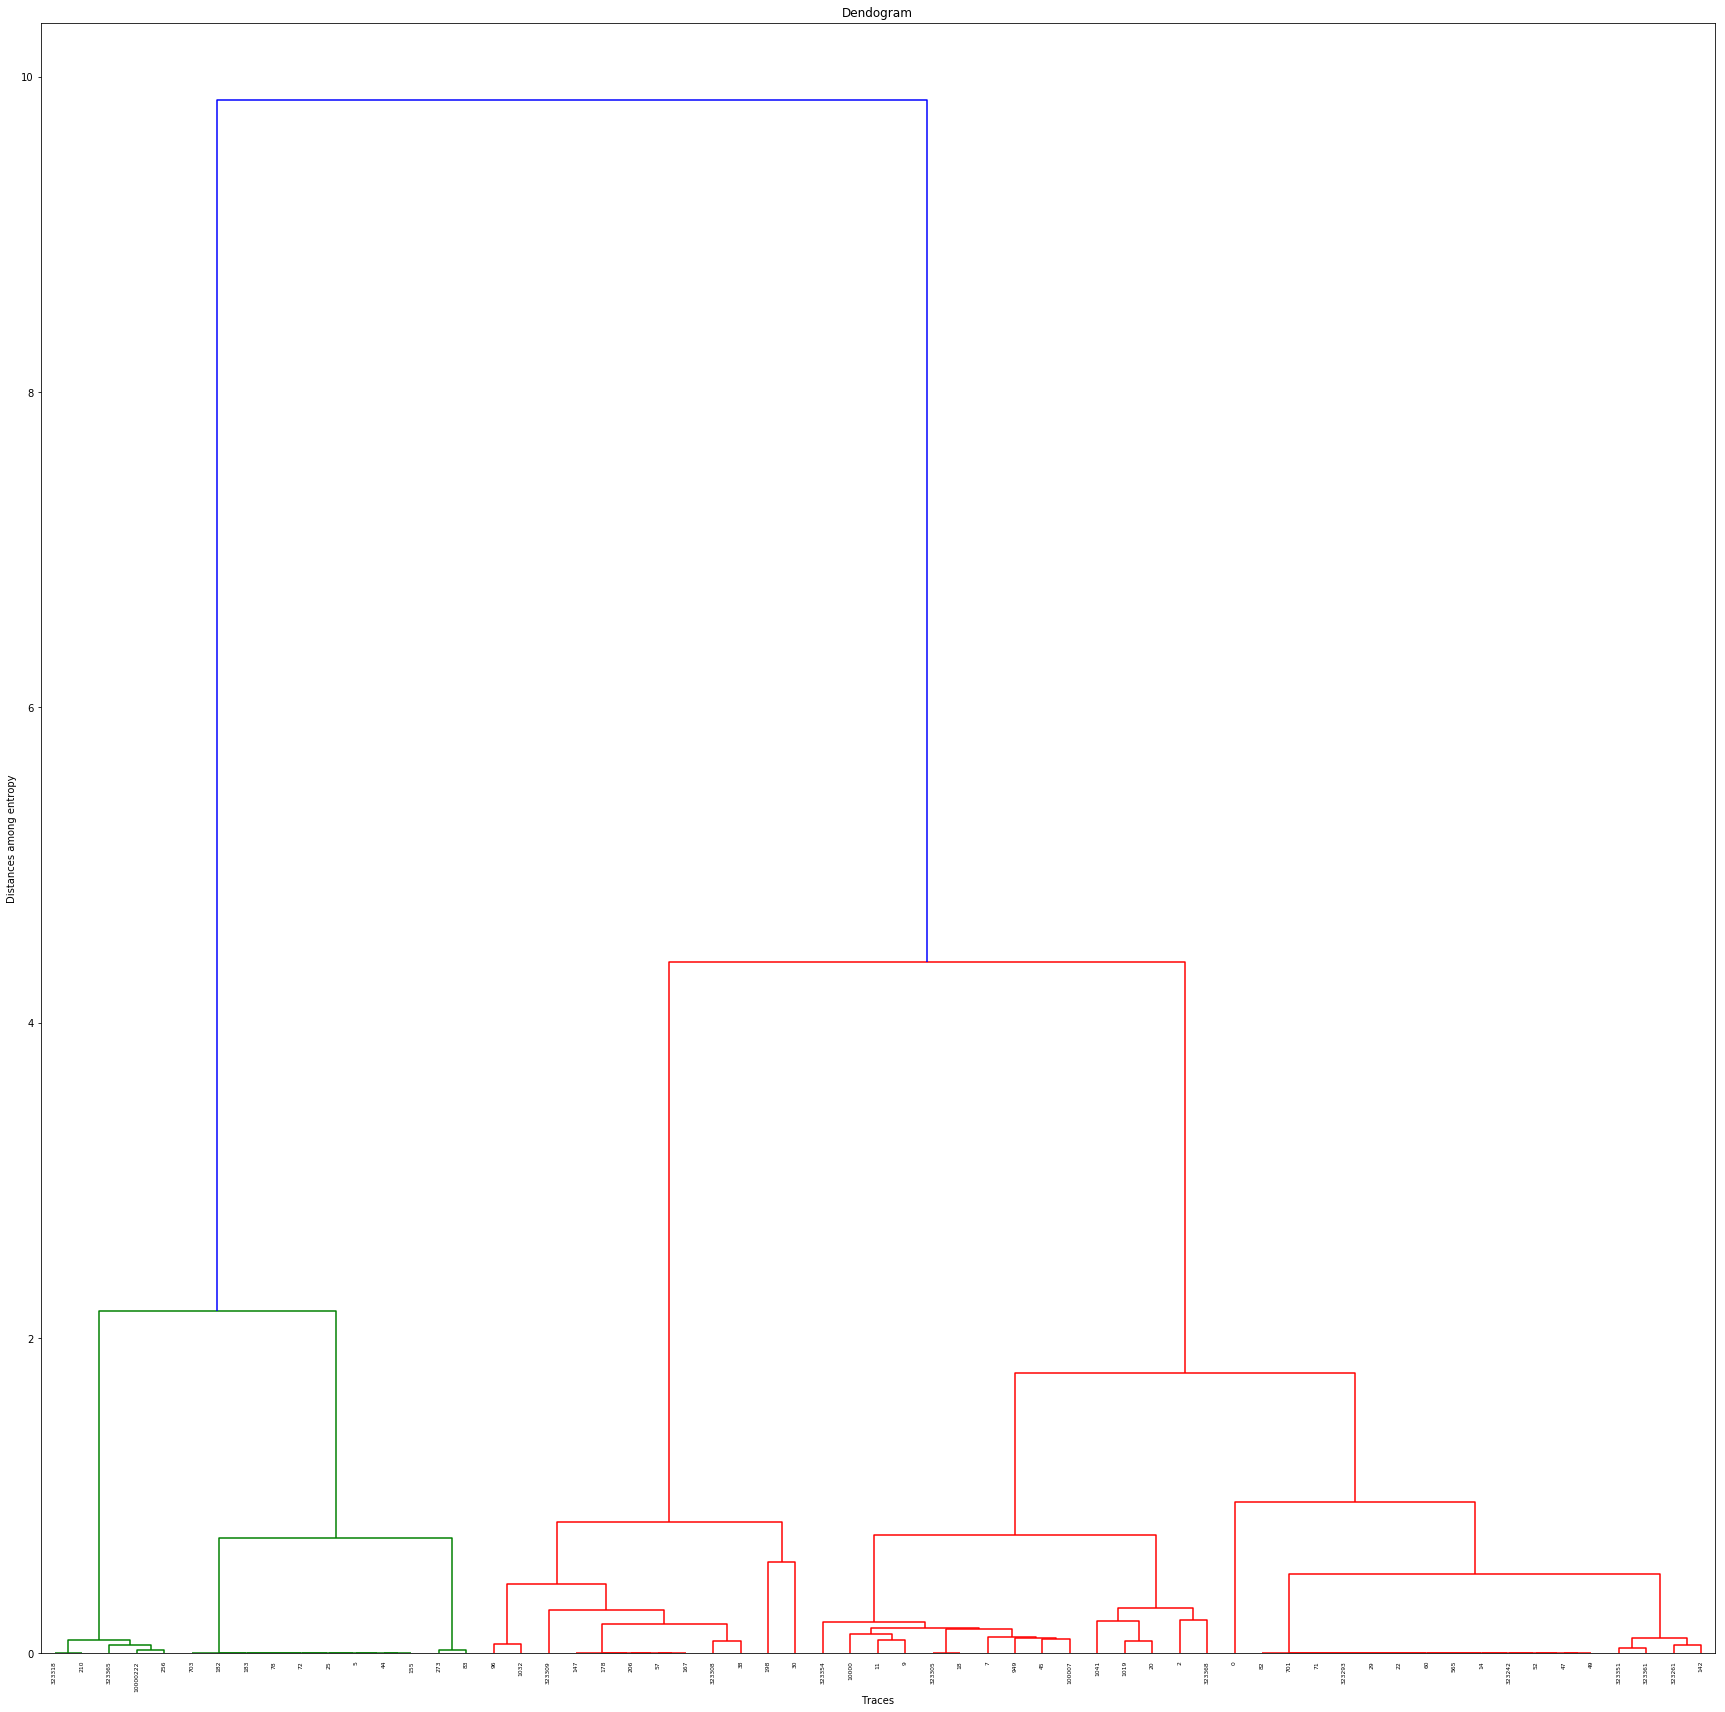

In [59]:
figure(figsize=(30,30))
dendrogram = sch.dendrogram(sch.linkage(df3.values, method = 'ward'), labels=df2['id_instance'].values)
plt.title('Dendogram')
plt.xlabel('Traces')
plt.ylabel('Distances among entropy')
plt.show()

Although we could select the number of clusters based on the previous dendogram, we wanted to make a study of the optimal number based on the best known indices.

For this purpose, we have used R, which has the NbClust library, which integrates everything necessary to carry out the study in a very simple way.

To run R within a python environment you need to configure a few environment variables and load some libraries:

In [60]:
import rpy2.rinterface 
import rpy2.rinterface as ri
rpy2.rinterface.get_initoptions()

(b'rpy2', b'--quiet', b'--no-save')

To be able to execute cells with R code in this notebook it is necessary to execute the following command:

In [61]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


First, by means of -o, the output variable is indicated, where we will obtain, for each indicator, the best value obtained with the best number of clusters. 

These values are stored in a list with which we can continue working in Python.

In order to obtain the optimum value of clusters, the necessary libraries are loaded and the matrices representing the process and the entropy are read.

With NbClust, we obtain the values of optimal clusters, using the entropy matrix as a distance matrix and the Ward method as a clustering method.

In [62]:
%%R -o optimalclusterslist

library(factoextra)
library(cluster)
library(NbClust)
library(tidyverse)

process_matrix <- read_csv("./files/my_process_dataframe.csv")
entropy_matrix <- read_csv("./files/my_process_entropy_matrix.csv")
entropy_matrix <- entropy_matrix[2:62]

indexes <- c("kl", "ch", "hartigan","cindex", "db", "silhouette", "duda", "pseudot2", "ratkowsky", "ball", "ptbiserial", "frey", "mcclain", "gamma", "gplus", "tau", "dunn", "sdindex", "sdbw")

optimalclusterslist <- c()

for(i in indexes){
  set.seed(123)
  res<-NbClust(process_matrix,diss=as.dist(entropy_matrix), distance = NULL, min.nc=2, max.nc=10, method = "ward.D2", index = i)
  optimalclusterslist <- c(optimalclusterslist,res$Best.nc)
}


/home/angel/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Parsed with column specification:
cols(
  .default = col_double()
)

  warnings.warn(x, RRuntimeWarning)
/home/angel/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: See spec(...) for full column specifications.

  warnings.warn(x, RRuntimeWarning)


Since the list we get is a list where in each even number we have the optimal value of clusters for an index and each odd number is an index value, we filter to keep only the even numbers, and therefore, the optimal number of clusters.

Finally, we count the number of times each optimal k is recommended.

In [63]:
clusters_numbers = [y for x,y in enumerate(optimalclusterslist) if x%2 == 0]
Counter(clusters_numbers)

Counter({2.0: 7, 3.0: 3, 4.0: 2, 5.0: 2, 10.0: 5})

In view of the results and the dendrogram, we choose the option of 5 clusters, so, k=5.

In [64]:
k = 5

Execute the agglomerative hierarchical clustering algorithm.

Documentation : https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [65]:
hc = AgglomerativeClustering(n_clusters = k, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(df3.values)

/home/angel/.local/lib/python3.4/site-packages/scipy/cluster/hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


We create a list for each cluster that will contain the identifier of the traces that belong to the cluster.

In [66]:
instances_cluster0 = []
instances_cluster1 = []
instances_cluster2 = []
instances_cluster3 = []
instances_cluster4 = []

#Add as many as the number of clusters you have selected
#instances_clusterx = []

for i in range(0,len(y_hc)):
    instance = df2['id_instance'][i]
    instance_cluster = y_hc[i]
    if(instance_cluster == 0):
        instances_cluster0.append(instance)
    elif(instance_cluster == 1):
        instances_cluster1.append(instance)
    elif(instance_cluster == 2):
        instances_cluster2.append(instance)
    elif(instance_cluster == 3):
        instances_cluster3.append(instance)
    elif(instance_cluster == 4):
        instances_cluster4.append(instance)
    
    #Add as many as the number of clusters you have selected
    #elif(instance_cluster == x):
        #instances_clusterx.append(instance)
    

Generates a dataframe, portion of the original, for each cluster with the traces that correspond in each one. 

In [67]:
df_cluster0 = df.loc[df['id_instance'].isin(instances_cluster0)]
df_cluster1 = df.loc[df['id_instance'].isin(instances_cluster1)]
df_cluster2 = df.loc[df['id_instance'].isin(instances_cluster2)]
df_cluster3 = df.loc[df['id_instance'].isin(instances_cluster3)]
df_cluster4 = df.loc[df['id_instance'].isin(instances_cluster4)]

#Add as many as the number of clusters you have selected
#df_clusterx = df.loc[df['id_instance'].isin(instances_clusterx)]

This function follows the same logic in the construction of entropy matrix, to generate an entropy matrix for each cluster whose matrix is passed as a parameter.

In [68]:
def get_entropy_matrix(df_param):
    columns = df_param['id_instance'].values
    df2 = pd.DataFrame(columns=columns)
    df2['id_instance'] = df_param['id_instance']
    cols = df2.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df2 = df2[cols]


    total_activities = len(df_param.columns) - 1 #-1 because the id_instance column should not be counted
    for i in range(df_param.shape[0]):
        row1 = df_param.iloc[i]
        for j in range(df_param.shape[0]):
            row2 = df_param.iloc[j]
            ne = (row1 == row2)
            serie_value_counts = ne.value_counts()
            if (False in serie_value_counts):
                value_counts = serie_value_counts[False]
            else:
                value_counts = 0
            entropy = value_counts/total_activities
            df2.iloc[i,j+1] = entropy
            
    return df2

In [69]:
cluster0_entropy = get_entropy_matrix(df_cluster0)
cluster1_entropys = get_entropy_matrix(df_cluster1)
cluster2_entropys = get_entropy_matrix(df_cluster2)
cluster3_entropys = get_entropy_matrix(df_cluster3)
cluster4_entropys = get_entropy_matrix(df_cluster4)

#Add as many as the number of clusters you have selected
#clusterx_entropys = get_entropys_matrix(df_clusterx)

The following function returns the entropy of a cluster that is passed as a parameter where the entropy is calculated as in the matrix: the sum of different activities executed among all the traces over the total of possible different activities within the process.

In [70]:
def get_cluster_entropy(df_param):
    sumequals = 0
    for i in df_param.columns:
        if(i != 'id_instance'):
            if((df_param[i].sum() == 0) or (df_param[i].sum() == df_param.shape[0])):
                sumequals = sumequals + 1

    activities = len(df_param.columns)-1
    diff = activities-sumequals
    entropy = diff/activities
    return entropy

In [71]:
cluster0_entropy = get_cluster_entropy(df_cluster0)
cluster1_entropy = get_cluster_entropy(df_cluster1)
cluster2_entropy = get_cluster_entropy(df_cluster2)
cluster3_entropy = get_cluster_entropy(df_cluster3)
cluster4_entropy = get_cluster_entropy(df_cluster4)


#Add as many as the number of clusters you have selected
#clusterx_entropy = get_cluster_entropy(df_clusterx)

In [72]:
print("Cluster 1 entropy: ", cluster0_entropy)
print("Cluster 2 entropy: ", cluster1_entropy)
print("Cluster 3 entropy: ", cluster2_entropy)
print("Cluster 4 entropy: ", cluster3_entropy)
print("Cluster 5 entropy: ", cluster4_entropy)

#Add as many as the number of clusters you have selected
#print("Cluster x entropy: ", clusterx_entropy)

Cluster 1 entropy:  0.11778290993071594
Cluster 2 entropy:  0.3695150115473441
Cluster 3 entropy:  0.3094688221709007
Cluster 4 entropy:  0.018475750577367205
Cluster 5 entropy:  0.06466512702078522


## Construction of the XES of each generated cluster

First, a log with XES format for each cluster is created. These logs will be empty, they will only contain the XES headers, without any trace.

In [73]:
xml.register_namespace('', "http://www.xes-standard.org/")
root0 = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
tree0 = ElementTree.ElementTree(root0)

root1 = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
tree1 = ElementTree.ElementTree(root1)

root2 = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
tree2 = ElementTree.ElementTree(root2)

root3 = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
tree3 = ElementTree.ElementTree(root3)

root4 = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
tree4 = ElementTree.ElementTree(root4)

#Add as many as the number of clusters you have selected
#rootx = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
#treex = ElementTree.ElementTree(rootx)

The objects corresponding to each trace are chosen from the original XES and added to the corresponding file according to the cluster it belongs to.

In [74]:
xml.register_namespace('', "http://www.xes-standard.org/")
tree = xml.parse(path)
root = tree.getroot()

for node in root:
    for child in node:
        if (child.tag == '{http://www.xes-standard.org/}string'): 
                instance_id = child.attrib['value']
                if (instance_id in instances_cluster0):
                    root0.append(node)
                elif (instance_id in instances_cluster1):
                    root1.append(node)
                elif (instance_id in instances_cluster2):
                    root2.append(node)
                elif (instance_id in instances_cluster3):
                    root3.append(node)
                elif (instance_id in instances_cluster4):
                    root4.append(node)
            
                #Add as many as the number of clusters you have selected
                #elif (instance_id in instances_clusterx):
                    #rootx.append(node)

Finally, the XES logs of each cluster that can be used with Process Discovery tools will be stored in the computer.

In [75]:
with open('./cluster0.xes', "wb") as fh0:
    tree0.write(fh0)

with open('./cluster1.xes', "wb") as fh1:
    tree1.write(fh1)

with open('./cluster2.xes', "wb") as fh2:
    tree2.write(fh2)

with open('./cluster3.xes', "wb") as fh3:
    tree3.write(fh3)

with open('./cluster4.xes', "wb") as fh4:
    tree4.write(fh4)


#Add as many as the number of clusters you have selected
#with open('./clusterx.xes', "wb") as fhx:
    #treex.write(fhx)

## Entropy transitions matrix

We start building the entropy matrix using a dataframe that will have as many rows and columns as there are traces in our event log.

Additionally, we will have one more column that will represent the identifier of each trace. As in the previous process, operations are performed to position it first.

The resulting dataframe/matrix will be full of null values that we will fill in later.

In [76]:
columns = df['id_instance'].values
df5 = pd.DataFrame(columns=columns)
df5['id_instance'] = df['id_instance']
cols = df5.columns.tolist()
cols = cols[-1:] + cols[:-1]
df5 = df5[cols]

We then create the function that gets the transitions for each node within the process. 

Before executing this function it is necessary to have the definition of the process in BPMN format. This is possible through ProM, mining the XES to obtain a process tree with Inductive Miner and mining the process tree to obtain a BPMN definition of the process through the ProM plugin implemented for it.

After that, this function will read and parse the XML that defines the process in BPMN and will obtain the number of transitions that come out from each node of the process (activities and gateways).

In [77]:
def get_transitions_list(path):
    tree = xml.parse(path)
    root = tree.getroot()
    process = root[0]
    tasks = process.findall('{http://www.omg.org/spec/BPMN/20100524/MODEL}task')
    exclusive_gateways = process.findall('{http://www.omg.org/spec/BPMN/20100524/MODEL}exclusiveGateway')
    parallel_gateways = process.findall('{http://www.omg.org/spec/BPMN/20100524/MODEL}parallelGateway')
    start_event = process.findall('{http://www.omg.org/spec/BPMN/20100524/MODEL}startEvent')
    end_event = process.findall('{http://www.omg.org/spec/BPMN/20100524/MODEL}endEvent')
    sequenceFlows = process.findall('{http://www.omg.org/spec/BPMN/20100524/MODEL}sequenceFlow')
    mapped_tasks = list(map(lambda x: {'task': x.attrib['name'], 'id':x.attrib['id']}, tasks))
    counter = itertools.count(0)
    mapped_exclusive_gateways =  [{'exclusive_gateway': 'exclusive_gateway'+str(next(counter)) , 'id':g.attrib['id']} for g in exclusive_gateways]
    mapped_parallel_gateways =  [{'parallel_gateway': 'parallel_gateway'+str(next(counter)) , 'id':g.attrib['id']} for g in parallel_gateways]
    zipped_sequenceFlows =list(map(lambda x: {'source': x.attrib['sourceRef'], 'target': x.attrib['targetRef']}, sequenceFlows))
    mapped_sources_targets = list(map(lambda seq: {'source': [task['task'] for task in mapped_tasks if task['id'] == seq['source']] or [g['exclusive_gateway'] for g in mapped_exclusive_gateways if g['id'] == seq['source']] or [g['parallel_gateway'] for g in mapped_parallel_gateways if g['id'] == seq['source']] or [s.attrib['name'] for s in start_event if s.attrib['id'] == seq['source']], 'target': [task['task'] for task in mapped_tasks if task['id'] == seq['target']] or [g['exclusive_gateway'] for g in mapped_exclusive_gateways if g['id'] == seq['target']] or [g['parallel_gateway'] for g in mapped_parallel_gateways if g['id'] == seq['target']] or [s.attrib['name'] for s in end_event if s.attrib['id'] == seq['target']]},zipped_sequenceFlows))
    keys = [d['source'] for d in mapped_sources_targets]
    mapped_sources_targets_grouped = list(map(lambda x: {'source':x, 'targets': [d['target'] for d in mapped_sources_targets if d['source']==x]}, keys))
    mapped_sources_targets_grouped = list(map(lambda x: {'source': x['source'], 'targets':[i[0] for i in x['targets']]} if x['targets'] != [[]] else {'source': x['source'], 'targets':[]},mapped_sources_targets_grouped))
    mapped_sources_targets_grouped = list(unique_everseen(mapped_sources_targets_grouped))
            
    return mapped_sources_targets_grouped

We now proceed to create the matrix of entropy by transitions. 

This entropy is calculated as the number of different transitions divided by the different activities for each pair of traces between the total number of possible transitions.

To do this, the bpmn file of each xes will be needed.

In [79]:
transitions = get_transitions_list('./files/bpmnerpvalid.bpmn')
transitions_denominator = sum([len(x['targets']) for x in transitions])
activities = df.columns
for i in range(df.shape[0]):
    row1 = df.iloc[i]
    df_temp = pd.DataFrame()
    df_temp[0] = row1
    for j in range(df.shape[0]):
        row2 = df.iloc[j]
        df_temp[1] = row2
        df_temp = df_temp.T
        df_temp = df_temp.loc[:, (df_temp != 0).any()]
        acts_row1 = [c for c in df_temp.columns if df_temp[c][0] == 1.0]
        transitions1 = [d['targets'][0] for d in transitions if d['source'][0] in acts_row1]
        diff_transitions1_c = Counter(transitions1)
        acts_row2 = [c for c in df_temp.columns if df_temp[c][1] == 1.0]
        transitions2 = [d['targets'][0] for d in transitions if d['source'][0] in acts_row2]
        diff_transitions2_c = Counter(transitions2)
        diff_trans = diff_transitions1_c - diff_transitions2_c
        total_diff_trans = sum(diff_trans.values())
        entropy = total_diff_trans/transitions_denominator 
        df5.iloc[i,j+1] = entropy

df5

,id_instance,44,323354,45,47,323351,49,273,198,1019,...,183,142,147,10000,701,703,82,83,949,100007
0,44,0,0,0.134638,0,0.130035,0,0.00345224,0,0.133487,...,0,0.130035,0,0.130035,0,0,0,0.00345224,0,0.134638
1,323354,0,0,0.0161105,0,0.00920598,0,0.013809,0,0.018412,...,0,0.013809,0,0.018412,0,0.0172612,0,0.013809,0,0.018412
2,45,0.00115075,0,0,0,0.0149597,0,0.0126582,0,0.0149597,...,0,0.0149597,0,0.0126582,0,0.0126582,0,0.0126582,0,0.0126582
3,47,0,0,0.0287687,0,0,0,0.0253165,0,0.0310702,...,0,0,0,0.0299194,0,0.0241657,0,0.0253165,0,0.0310702
4,323351,0,0,0.0437284,0,0,0,0.0379747,0,0.0460299,...,0,0.00920598,0,0.0448792,0,0.0391254,0,0.0379747,0,0.0460299
5,49,0,0,0.0287687,0,0,0,0.0253165,0,0.0310702,...,0,0,0,0.0299194,0,0.0241657,0,0.0253165,0,0.0310702
6,273,0.0241657,0,0.158803,0,0.153049,0,0,0,0.157652,...,0,0.155351,0,0.1542,0,0.027618,0,0,0,0.158803
7,198,0.00115075,0,0.0690449,0,0.0598389,0,0.0575374,0,0.0644419,...,0,0.0609896,0,0.0655926,0,0.0586881,0,0.0575374,0,0.0678941
8,1019,0,0,0.0264672,0,0.0287687,0,0.0253165,0,0,...,0,0.0287687,0,0.027618,0,0.0253165,0,0.0253165,0,0.0287687
9,155,0,0,0.134638,0,0.130035,0,0.00345224,0,0.133487,...,0,0.130035,0,0.130035,0,0,0,0.00345224,0,0.134638


Once created, we verify that it is a symmetrical matrix whose diagonal is completely filled with zeros.

In [80]:
len(df5.columns[1:len(df.columns)]), len(df5['id_instance']), len(np.diag(df5.iloc[:,1:len(df.columns)])), np.diag(df5.iloc[:,1:len(df.columns)])

(61,
 61,
 61,
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object))

We can save it in a csv to avoid its calculation each time we start working.

In [ ]:
df5.to_csv("./files/my_process_transitions_entropy_matrix.csv", encoding='utf-8', index=False)

## Hierarchical Agglomerative Clustering and Entropy for Transitions Entropy

In [ ]:
#Run just in case you need to read the matrix from the file
df5 = pd.read_csv('./files/my_process_transitions_entropy_matrix.csv')
df5

We create a new matrix from the previous one, ignoring this time the column that represents the identifier of the trace.

In [81]:
df6 = df5.copy()
df6 = df6.iloc[:,1:len(df.columns)]

We begin by building the dendogram to have a better notion of the number of clusters we desired.

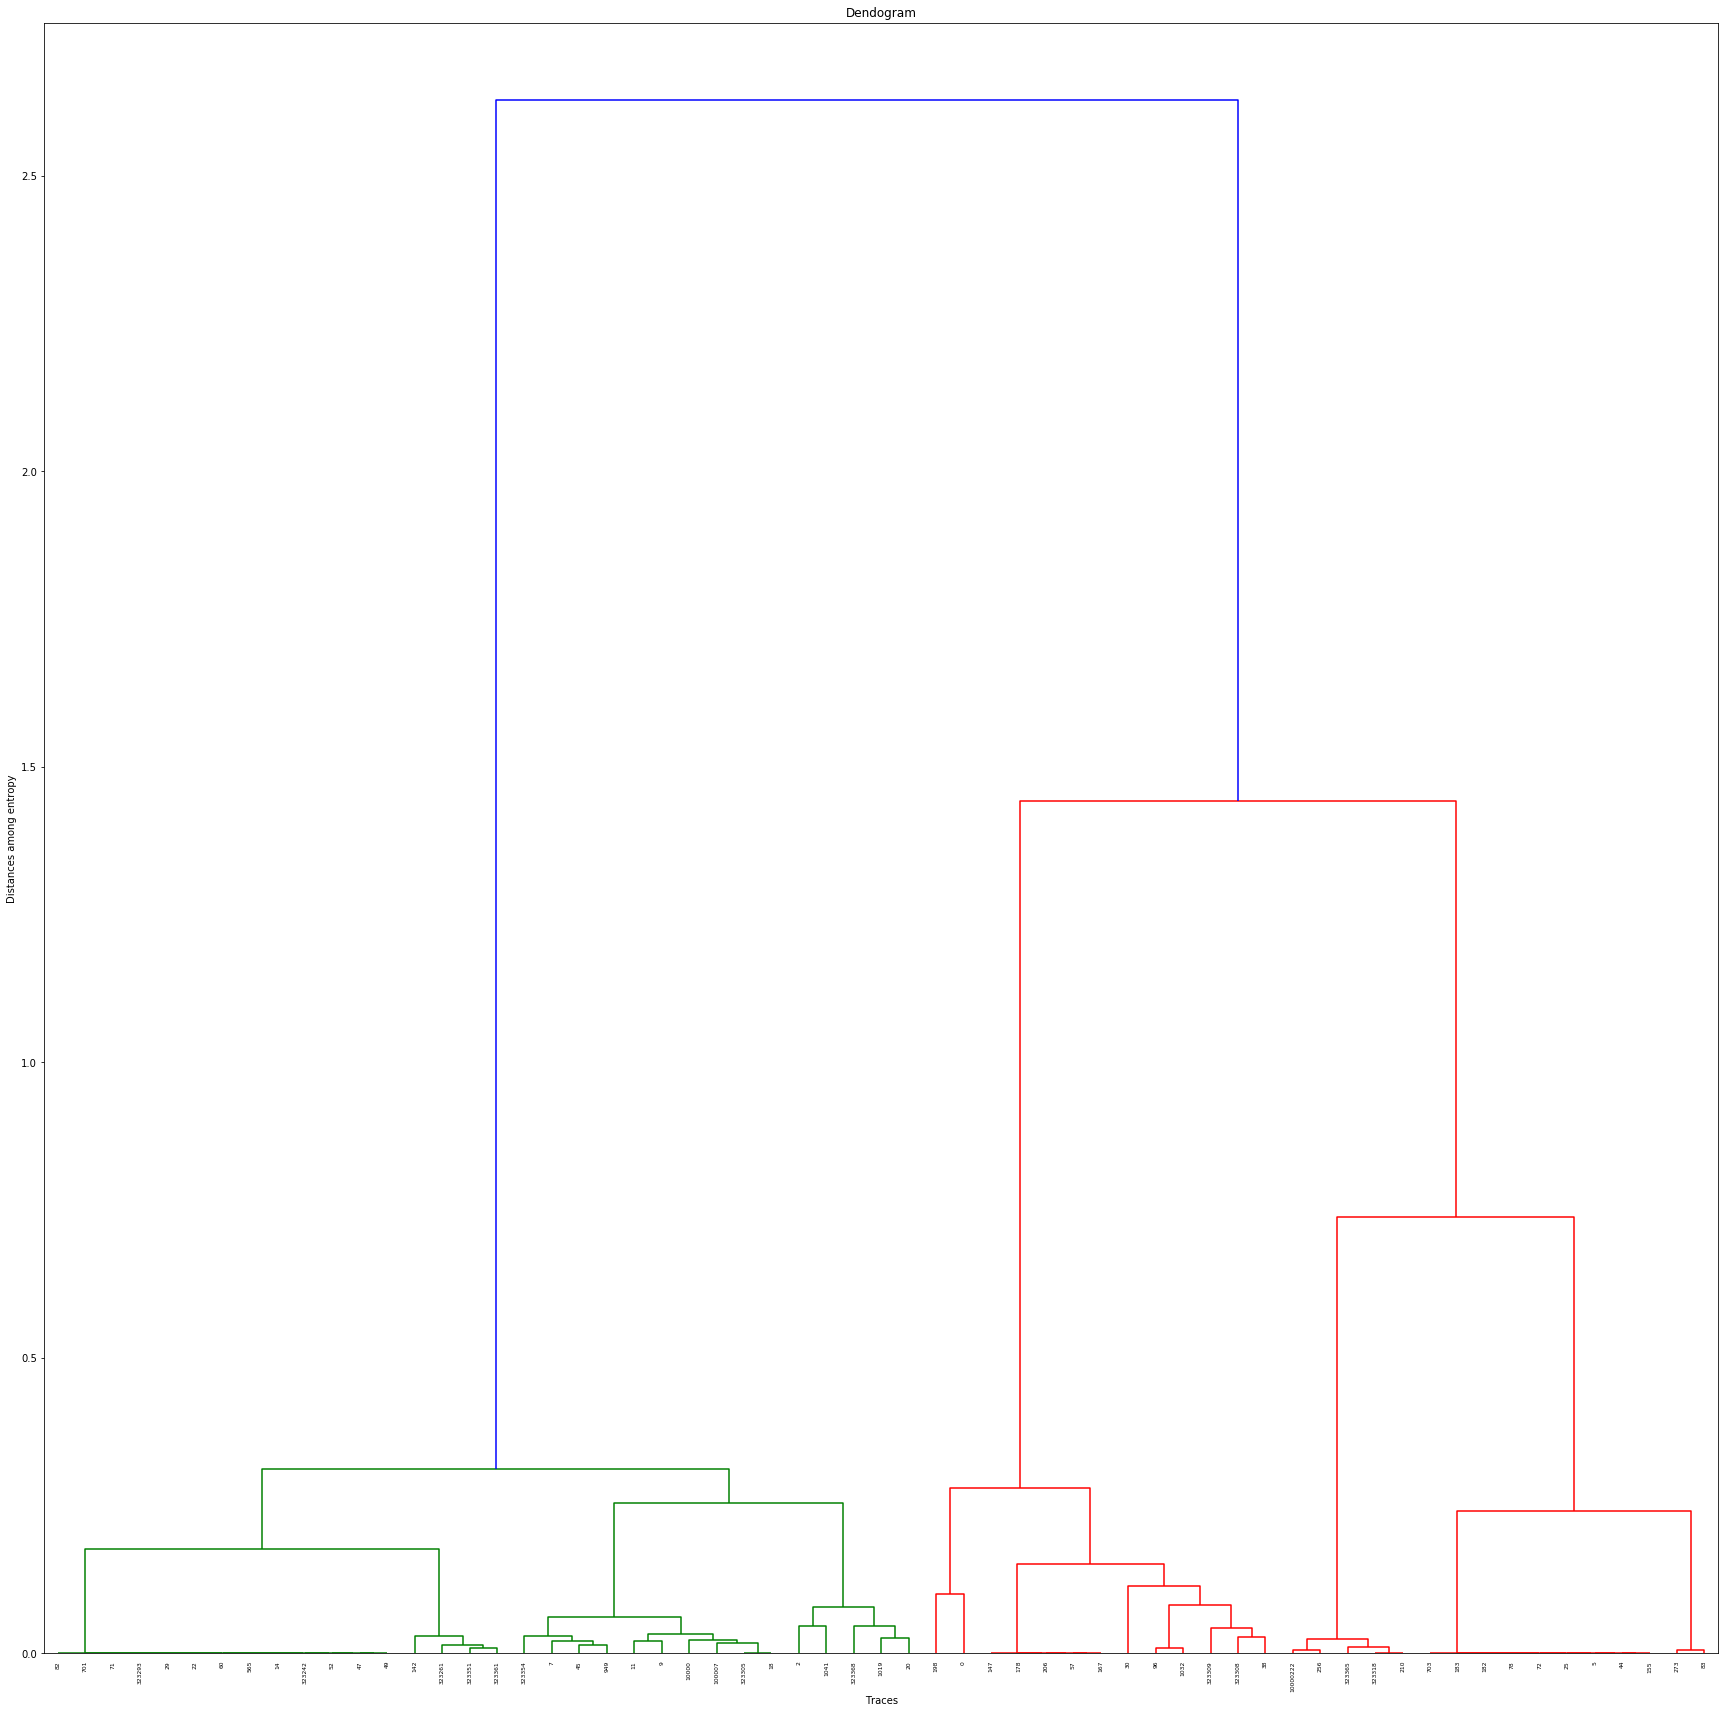

In [82]:
figure(figsize=(30,30))
dendrogram = sch.dendrogram(sch.linkage(df6.values, method = 'ward'), labels=df5['id_instance'].values)
plt.title('Dendogram')
plt.xlabel('Traces')
plt.ylabel('Distances among entropy')
plt.show()

In [83]:
%%R -o optimalclusterstransitionslist

library(factoextra)
library(cluster)
library(NbClust)
library(tidyverse)

process_matrix <- read_csv("./files/my_process_dataframe.csv")
entropy_matrix <- read_csv("./files/my_process_transitions_entropy_matrix.csv")
entropy_matrix <- entropy_matrix[2:62]

indexes <- c("kl", "ch", "hartigan","cindex", "db", "silhouette", "duda", "pseudot2", "ratkowsky", "ball", "ptbiserial", "frey", "mcclain", "gamma", "gplus", "tau", "dunn", "sdindex", "sdbw")

optimalclusterstransitionslist <- c()

for(i in indexes){
  set.seed(123)
  res<-NbClust(process_matrix,diss=as.dist(entropy_matrix), distance = NULL, min.nc=2, max.nc=10, method = "ward.D2", index = i)
  optimalclusterstransitionslist <- c(optimalclusterstransitionslist,res$Best.nc)
}

/home/angel/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Parsed with column specification:
cols(
  .default = col_double()
)

  warnings.warn(x, RRuntimeWarning)
/home/angel/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: See spec(...) for full column specifications.

  warnings.warn(x, RRuntimeWarning)


In [84]:
clusters_numbers = [y for x,y in enumerate(optimalclusterstransitionslist) if x%2 == 0]
Counter(clusters_numbers)

Counter({-inf: 2, 2.0: 5, 3.0: 5, 4.0: 1, 8.0: 1, 9.0: 2, 10.0: 3})

Having into account the results of the indeces and the dendrogram, we choose the option of 3 clusters, so, k=3.

In [85]:
k = 3

We execute the clustering algorithm to obtain the groups of traces.

In [86]:
hc = AgglomerativeClustering(n_clusters = k, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(df6.values)

We create the groups that the algorithm has determined.

In [87]:
instances_transitions_cluster0 = []
instances_transitions_cluster1 = []
instances_transitions_cluster2 = []


#Add as many as the number of clusters you have selected
#instances_clusterx = []

for i in range(0,len(y_hc)):
    instance = df5['id_instance'][i]
    instance_cluster = y_hc[i]
    if(instance_cluster == 0):
        instances_transitions_cluster0.append(instance)
    elif(instance_cluster == 1):
        instances_transitions_cluster1.append(instance)
    elif(instance_cluster == 2):
        instances_transitions_cluster2.append(instance)


We obtain the matrix of traces for each cluster.

In [88]:
df_cluster0_trs = df.loc[df['id_instance'].isin(instances_transitions_cluster0)]
df_cluster1_trs = df.loc[df['id_instance'].isin(instances_transitions_cluster1)]
df_cluster2_trs = df.loc[df['id_instance'].isin(instances_transitions_cluster2)]

The value of the entropy for the clusters created will then be determined. To do this, it is first necessary to obtain the entropy matrix of each cluster and then compute the entropy.

To do this, we have the following two functions, the first, follows the same idea as the creation of the original entropy matrix of transitions. The second, calculates the entropy of each diven cluster as the sum of the entropy of the entropy matrix divided by the size of the entropy matrix, that is, by the possible total number of entropy that could exist. 

In [89]:
def get_cluster_transitions_matrix(df_param, bpmpath):
    transitions = get_transitions_list(bpmpath)
    transitions_denominator = sum([len(x['targets']) for x in transitions])
    activities = df_param.columns
    columns = df_param['id_instance'].values
    df_res = pd.DataFrame(columns=columns)
    df_res['id_instance'] = df_param['id_instance']
    cols = df_res.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_res = df_res[cols]
    for i in range(df_param.shape[0]):
        row1 = df_param.iloc[i]
        df_temp = pd.DataFrame()
        df_temp[0] = row1
        for j in range(df_param.shape[0]):
            row2 = df_param.iloc[j]
            df_temp[1] = row2
            df_temp = df_temp.T
            df_temp = df_temp.loc[:, (df_temp != 0).any()]
            acts_row1 = [c for c in df_temp.columns if df_temp[c][0] == 1.0]
            transitions1 = [d['targets'][0] for d in transitions if d['source'][0] in acts_row1]
            diff_transitions1_c = Counter(transitions1)
            acts_row2 = [c for c in df_temp.columns if df_temp[c][1] == 1.0]
            transitions2 = [d['targets'][0] for d in transitions if d['source'][0] in acts_row2]
            diff_transitions2_c = Counter(transitions2)
            diff_trans = diff_transitions1_c - diff_transitions2_c
            total_diff_trans = sum(diff_trans.values())
            entropy = total_diff_trans/transitions_denominator 
            df_res.iloc[i,j+1] = entropy

    return df_res


def cluster_trans_entropy(df_param):
    total_numberof_entropy = df_param.shape[0]*(df_param.shape[1]-1)
    sum_entropy = df_param.iloc[:,1:df_param.shape[1]].values.sum()
    total_entropy = sum_entropy/total_numberof_entropy
    return total_entropy

In [90]:
c0_trans_matrix = get_cluster_transitions_matrix(df_cluster0_trs, './files/bpmc0trans.bpmn')
c1_trans_matrix = get_cluster_transitions_matrix(df_cluster1_trs, './files/bpmc1trans.bpmn')
c2_trans_matrix = get_cluster_transitions_matrix(df_cluster2_trs,'./files/bpmc2trans.bpmn')

In [91]:
print("ERP-FILTERED entropy: ", cluster_trans_entropy(df5))

ERP-FILTERED entropy:  0.027229214711142376


In [92]:
print("cluster0 entropy: ", cluster_trans_entropy(c0_trans_matrix))
print("cluster1 entropy: ", cluster_trans_entropy(c1_trans_matrix))
print("cluster2 entropy: ", cluster_trans_entropy(c2_trans_matrix))

cluster0 entropy:  0.021371694711538457
cluster1 entropy:  0.02087305205570288
cluster2 entropy:  0.014659488644389686


## Construction of the XES of each generated cluster

First, a log with XES format for each cluster is created. These logs will be empty, they will only contain the XES headers, without any trace.

In [93]:
xml.register_namespace('', "http://www.xes-standard.org/")
root0 = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
tree0 = ElementTree.ElementTree(root0)

root1 = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
tree1 = ElementTree.ElementTree(root1)

root2 = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
tree2 = ElementTree.ElementTree(root2)

#Add as many as the number of clusters you have selected
#rootx = ElementTree.fromstring("<log xmlns='http://www.xes-standard.org/' openxes.version='nested-attributes' xes.features='nested-attributes' xes.version='1.0'></log>")
#treex = ElementTree.ElementTree(rootx)

The objects corresponding to each trace are chosen from the original XES and added to the corresponding file according to the cluster it belongs to.

In [94]:
xml.register_namespace('', "http://www.xes-standard.org/")
tree = xml.parse(path)
root = tree.getroot()

for node in root:
    for child in node:
        if (child.tag == '{http://www.xes-standard.org/}string'): 
                instance_id = child.attrib['value']
                if (instance_id in instances_cluster0):
                    root0.append(node)
                elif (instance_id in instances_cluster1):
                    root1.append(node)
                elif (instance_id in instances_cluster2):
                    root2.append(node)
            
                #Add as many as the number of clusters you have selected
                #elif (instance_id in instances_clusterx):
                    #rootx.append(node)

In [96]:
with open('./cluster0_trans.xes', "wb") as fh0:
    tree0.write(fh0)

with open('./cluster1_trans.xes', "wb") as fh1:
    tree1.write(fh1)

with open('./cluster2_trans.xes', "wb") as fh2:
    tree2.write(fh2)

#Add as many as the number of clusters you have selected
#with open('./clusterx.xes', "wb") as fhx:
    #treex.write(fhx)

## Lasagna Quality

In this section, the quality of each set of traces will be calculated using the function defined below as *get_quality*.

In this function, using the given set of traces, the columns full of 0's are removed. After that, the total number of configurations is calculated and is summed by columns. Finally,the final amount is computed and divided by the total number of configurations. To normalize the final result as a distance of the real number of features, the value of quality and features, is subtracted.

In [97]:
def get_quality(df_param):
    df_param = df_param.loc[:, (df_param != 0).any()]
    total_configurations = df_param.shape[0]
    df_param = df_param.apply(pd.to_numeric)
    sums = df_param.iloc[:,1:df.shape[1]].select_dtypes(pd.np.number).sum().rename('total')
    total_sum = sums.sum()
    lasagna_quality = total_sum/total_configurations
    lasagna_quality = (df_param.shape[1]-1) - lasagna_quality
    return lasagna_quality

In [98]:
print("ERP lasagna quality: ", get_quality(df_original), " Configurations: ", df_original.shape[0])

ERP lasagna quality:  1602.164705882353  Configurations:  170


In [99]:
print("ERP-Filtered lasagna quality: ", get_quality(df))
print("cluster0 features entroy lasagna quality: ", get_quality(df_cluster0))
print("cluster1 features entroy lasagna quality: ", get_quality(df_cluster1))
print("cluster2 features entroy lasagna quality: ", get_quality(df_cluster2))
print("cluster3 features entroy lasagna quality: ", get_quality(df_cluster3))
print("cluster4 features entroy lasagna quality: ", get_quality(df_cluster4))

ERP-Filtered lasagna quality:  365.1803278688525
cluster0 features entroy lasagna quality:  45.94444444444444
cluster1 features entroy lasagna quality:  143.46666666666667
cluster2 features entroy lasagna quality:  82.16666666666667
cluster3 features entroy lasagna quality:  2.4000000000000057
cluster4 features entroy lasagna quality:  21.090909090909093


In [100]:
print("ERP-Filtered lasagna quality: ", get_quality(df))
print("cluster0 features entroy lasagna quality: ", get_quality(df_cluster0_trs))
print("cluster1 features entroy lasagna quality: ", get_quality(df_cluster1_trs))
print("cluster2 features entroy lasagna quality: ", get_quality(df_cluster2_trs))

ERP-Filtered lasagna quality:  365.1803278688525
cluster0 features entroy lasagna quality:  53.875
cluster1 features entroy lasagna quality:  171.40625
cluster2 features entroy lasagna quality:  119.84615384615384


## Count transitions

Finally, the functions created to obtain the number of outgoing transitions of each node of the process is provided to be able to do the calculations of the quality metrics.

In [101]:
def get_total_transitions_in_bpm(bpmfile):
    transitions = get_transitions_list(bpmfile)
    transitions_denominator = sum([len(x['targets']) for x in transitions])
    return transitions_denominator

In [102]:
get_total_transitions_in_bpm('./files/cluster1bpmn.bpmn')

297

In [103]:
def get_gateways_transitions(bpmpath):
    trans = get_transitions_list(bpmpath)
    only_gateways = list(filter(lambda x: 'gateway' in x['source'][0], trans))
    gateways_totalnumberof_trans = list(map(lambda x: {'gateway':x['source'], 'outputs':len(x['targets'])},only_gateways))
    return gateways_totalnumberof_trans

In [104]:
get_gateways_transitions('./files/originalbpm.bpmn')

[{'gateway': ['exclusive_gateway12'], 'outputs': 2},
 {'gateway': ['exclusive_gateway11'], 'outputs': 2},
 {'gateway': ['exclusive_gateway2'], 'outputs': 2},
 {'gateway': ['exclusive_gateway0'], 'outputs': 112},
 {'gateway': ['exclusive_gateway1'], 'outputs': 2},
 {'gateway': ['exclusive_gateway3'], 'outputs': 47},
 {'gateway': ['exclusive_gateway4'], 'outputs': 2},
 {'gateway': ['exclusive_gateway5'], 'outputs': 44},
 {'gateway': ['exclusive_gateway6'], 'outputs': 3},
 {'gateway': ['exclusive_gateway7'], 'outputs': 2},
 {'gateway': ['exclusive_gateway8'], 'outputs': 3},
 {'gateway': ['exclusive_gateway9'], 'outputs': 2},
 {'gateway': ['exclusive_gateway10'], 'outputs': 55},
 {'gateway': ['exclusive_gateway13'], 'outputs': 2},
 {'gateway': ['exclusive_gateway14'], 'outputs': 1389},
 {'gateway': ['exclusive_gateway15'], 'outputs': 2},
 {'gateway': ['exclusive_gateway16'], 'outputs': 2},
 {'gateway': ['exclusive_gateway17'], 'outputs': 2},
 {'gateway': ['exclusive_gateway18'], 'outputs':